In [75]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [76]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
accidents_df = pd.read_csv('class_one_accidents.csv')
accidents_df.head()

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month
0,NS,Norfolk Southern Railway Company,2022,22,7,Derailment,Norfolk Southern Railway Company,22 7
1,CSX,CSX Transportation,2017,17,12,Derailment,CSX Transportation,17 12
2,NS,Norfolk Southern Railway Company,2022,22,7,Derailment,Norfolk Southern Railway Company,22 7
3,UP,Union Pacific Railroad Company,2022,22,2,Derailment,Union Pacific Railroad Company,22 2
4,UP,Union Pacific Railroad Company,2022,22,11,Derailment,Union Pacific Railroad Company,22 11


In [6]:
bnsf_df = accidents_df[accidents_df['railroad'] == 'BNSF Railway Company']
bnsf_df['tally'] = bnsf_df.groupby("Report Year")['Reporting Railroad Code'].transform('count')
bnsf_df = bnsf_df.drop_duplicates(subset=['Report Year', 'tally'])
bnsf_df

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Accident Type,railroad,accident_year_and_month,tally
11,BNSF,BNSF Railway Company,2022,22,5,Derailment,BNSF Railway Company,22 5,248
12,BNSF,BNSF Railway Company,2017,17,3,Derailment,BNSF Railway Company,17 3,254
1150,BNSF,BNSF Railway Company,2021,21,12,Derailment,BNSF Railway Company,21 12,197
2167,BNSF,BNSF Railway Company,2020,20,5,Derailment,BNSF Railway Company,20 5,248
3166,BNSF,BNSF Railway Company,2019,19,11,Derailment,BNSF Railway Company,19 11,301
4399,BNSF,BNSF Railway Company,2018,18,2,Derailment,BNSF Railway Company,18 2,288


In [70]:
miles_by_years = pd.read_csv('railway_miles_by_year.csv')
miles_by_years.head()

,year,company,profit,percentage change,Unnamed: 4,Unnamed: 5
0,"2,022.00",BNSF,"5,946,000,000.00",-0.01,NaN,NaN
1,"2,021.00",BNSF,"5,990,000,000.00",0.16,NaN,NaN
2,"2,020.00",BNSF,"5,161,000,000.00",-0.06,NaN,NaN
3,"2,019.00",BNSF,"5,481,000,000.00",0.05,NaN,NaN
4,"2,018.00",BNSF,"5,219,000,000.00",0.34,NaN,NaN


In [52]:
tally_df = accidents_df.groupby(['Reporting Railroad Code', 'Report Year']).size().reset_index(name='tally')
accidents_df = pd.merge(accidents_df, tally_df, on=['Reporting Railroad Code', 'Report Year'])
accidents_df.drop_duplicates(subset=['Reporting Railroad Code', 'Report Year'], keep='first', inplace=True)

In [53]:
accidents_df = accidents_df [['Report Year','railroad','tally_x']]
accidents_df = accidents_df.drop_duplicates(subset=["Report Year", "railroad"])

In [54]:
accidents_df = accidents_df.sort_values(by=['Report Year', 'railroad']).reset_index(drop=True)
accidents_df

,Report Year,railroad,tally_x
0,2017,BNSF,254
1,2017,CSX,158
2,2017,Canadian National Railways,6
3,2017,Canadian Pacific,9
4,2017,Kansas City Southern,28
5,2017,Norfolk Southern,182
6,2017,Union Pacific,322
7,2018,BNSF,288
8,2018,CSX,195
9,2018,Canadian National Railways,10


In [56]:
# create a dictionary with old and new names
rename_dict = {'Union Pacific Railroad Company': 'Union Pacific', 
               'Canadian National - North America': 'Canadian National Railways', 
               'Norfolk Southern Railway Company': 'Norfolk Southern', 
               'Kansas City Southern Railway Company': 'Kansas City Southern', 
               'Canadian Pacific Railway Company': 'Canadian Pacific', 
               'CSX Transportation': 'CSX', 
               'BNSF Railway Company': 'BNSF'}

# replace the values in the 'railroad' column
accidents_df['railroad'] = accidents_df['railroad'].replace(rename_dict)


In [ ]:
merged_df = pd.merge(miles_by_years, accidents_df, left_on=['year', 'company'], right_on=['Report Year', 'railroad'], how='inner')
merged_df

In [ ]:
merged_df['miles_in_millions'] = merged_df['miles'] / 1000000
merged_df['accidents_per_million_miles_traveled'] = merged_df['tally_x'] / merged_df['miles_in_millions']
merged_df.head()

In [ ]:
merged_df.to_csv('accidents_per_year_per_million_mile')

In [28]:
%%R

# Read data
accidents_per_year_per_million_mile <- read_csv('accidents_per_year_per_million_mile')
accidents_per_year_per_million_mile

New names:
• `` -> `...1`
Rows: 42 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): company, railroad
dbl (7): ...1, year, miles, Report Year, tally_x, miles_in_millions, acciden...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 42 × 9
    ...1  year company           miles Report …¹ railr…² tally_x miles…³ accid…⁴
   <dbl> <dbl> <chr>             <dbl>     <dbl> <chr>     <dbl>   <dbl>   <dbl>
 1     0  2022 BNSF          152221459      2022 BNSF        248    152.    1.63
 2     1  2021 BNSF          155909753      2021 BNSF        196    156.    1.26
 3     2  2020 BNSF          155221099      2020 BNSF        248    155.    1.60
 4     3  2019 BNSF          175821676      2019 BNSF        300    176.    1.71
 5     4  2018 BNSF          187270156      2018 BNSF        288    187.    1.54
 6     5  

In [29]:
%%R 

library(ggplot2)

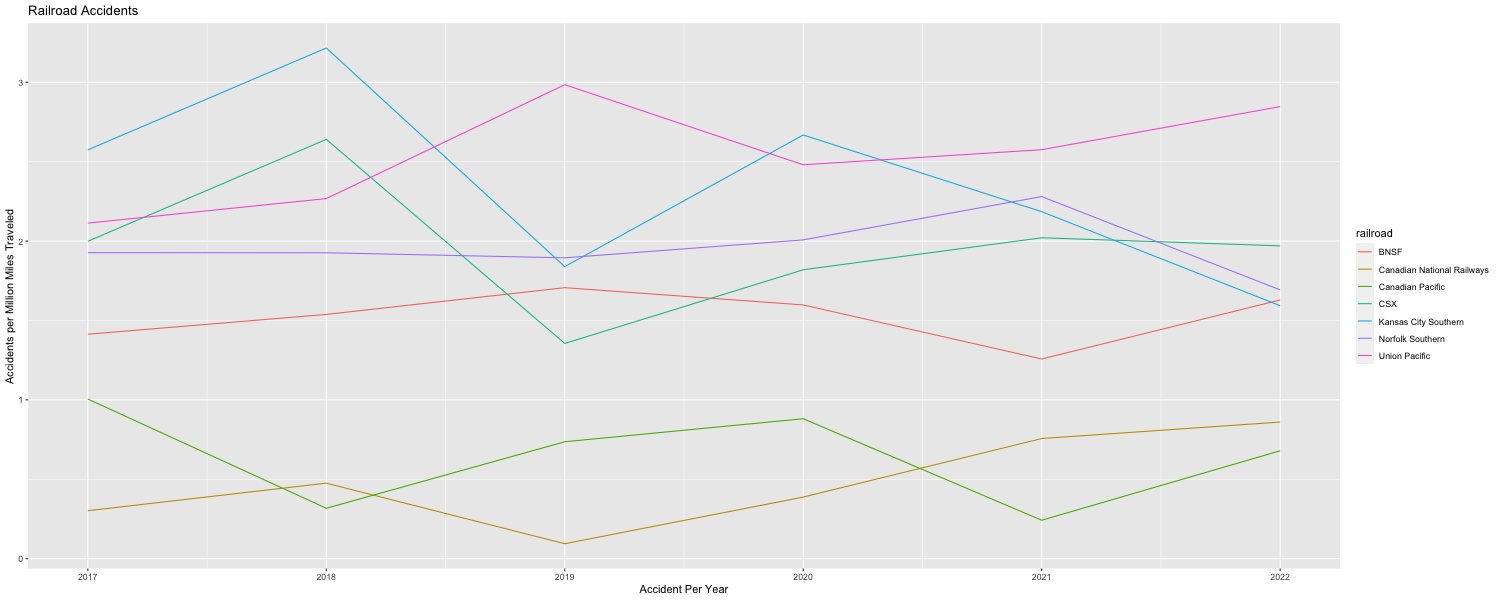

In [30]:
%%R -w 1500 -h 600

ggplot(data = accidents_per_year_per_million_mile, aes(x = year, y = accidents_per_million_miles_traveled, group = railroad, color = railroad)) + 
  geom_line() + 
  labs(x = "Accident Per Year", y = "Accidents per Million Miles Traveled", title = "Railroad Accidents")


In [31]:
data = pd.read_csv("railway_stock_price.csv")

data.head()

,date,unp_close,unp_percentage_change,berkshire_close,berkshire_percentage_change,csx_close,csx_percentage_change,nsc_close,nsc_percentage_change,cni_close,cni_percentage_change,cp_close,cp_percentage_change,kansas_close,kansas_percentage_change
0,2018-04-03,134.38,NaN,197.96,NaN,18.58,NaN,133.37,NaN,73.43,NaN,35.21,NaN,110.05,NaN
1,2018-04-04,132.90,-0.01,200.11,0.01,18.49,-0.00,131.98,-0.01,73.71,0.00,35.11,-0.00,111.61,0.01
2,2018-04-05,133.10,0.00,200.85,0.00,18.53,0.00,133.70,0.01,74.65,0.01,35.34,0.01,112.22,0.01
3,2018-04-06,130.28,-0.02,195.49,-0.03,18.12,-0.02,129.36,-0.03,73.98,-0.01,34.63,-0.02,108.48,-0.03
4,2018-04-09,130.02,-0.00,195.33,-0.00,18.14,0.00,128.92,-0.00,74.65,0.01,35.11,0.01,108.72,0.00


In [32]:
monthly_stock_price = pd.read_csv("railway_prices_monthly.csv")
monthly_stock_price.head()

,date,close,percentage_change,profit,company
0,2018-05-01,142.76,NaN,NaN,unp
1,2018-06-01,141.68,-0.01,NaN,unp
2,2018-07-01,149.89,0.06,NaN,unp
3,2018-08-01,150.62,0.00,NaN,unp
4,2018-09-01,162.83,0.08,"21,820,000,000",unp


In [33]:
monthly_stock_price.dtypes

date                  object
close                float64
percentage_change    float64
profit                object
company               object
dtype: object

In [35]:
railway_profit = pd.read_csv("railway_profit_and_derailments.csv")
railway_profit.head()

,year,company,profit,percentage change,notes,derailments,miles_traveled,derailments_per_million_miles
0,2022,BNSF,5946000000,-0.01,NaN,248,152.22,1.63
1,2021,BNSF,5990000000,0.16,NaN,197,155.91,1.26
2,2020,BNSF,5161000000,-0.06,NaN,248,155.22,1.60
3,2019,BNSF,5481000000,0.05,NaN,301,175.82,1.71
4,2018,BNSF,5219000000,0.34,NaN,288,187.27,1.54


In [36]:
print(railway_profit.columns)

Index(['year ', 'company', 'profit', 'percentage change', 'notes',
       'derailments', 'miles_traveled ', 'derailments_per_million_miles'],
      dtype='object')


In [37]:
pd.options.display.float_format = '{:,.2f}'.format
railway_profit.groupby('year ')['profit'].sum()

year 
2018    21820000000
2019    22393000000
2020    19746000000
2021    25052000000
2022    26790000000
Name: profit, dtype: int64

In [38]:
railway_profit.groupby('company').profit.sum()

company
BNSF                          27797000000
CSX                           17352000000
Canadian National Railways    16420000000
Canadian Pacific               9801000000
Norfolk Southern              13676000000
Union Pacific                 30755000000
Name: profit, dtype: int64

In [39]:
%%R

# Read data
monthly_stock_price <- read_csv('railway_prices_monthly.csv')
monthly_stock_price$profit <- as.double(monthly_stock_price$profit)
monthly_stock_price

Rows: 360 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): company
dbl  (2): close, percentage_change
num  (1): profit
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 360 × 5
   date       close percentage_change      profit company
   <date>     <dbl>             <dbl>       <dbl> <chr>  
 1 2018-05-01  143.          NA                NA unp    
 2 2018-06-01  142.          -0.00756          NA unp    
 3 2018-07-01  150.           0.0579           NA unp    
 4 2018-08-01  151.           0.00487          NA unp    
 5 2018-09-01  163.           0.0811  21820000000 unp    
 6 2018-10-01  146.          -0.102   21820000000 unp    
 7 2018-11-01  154.           0.0517  21820000000 unp    
 8 2018-12-01  138.          -0.101   21820000000 unp    
 9 2019-01-01  159.           0.151        

In [40]:
%%R

# Read data
railway_profits <- read_csv('railway_profit_and_derailments.csv')
railway_profits

Rows: 30 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): company, notes
dbl (6): year, profit, percentage change, derailments, miles_traveled, derai...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 30 × 8
    year company           profit percentage cha…¹ notes derai…² miles…³ derai…⁴
   <dbl> <chr>              <dbl>            <dbl> <chr>   <dbl>   <dbl>   <dbl>
 1  2022 BNSF          5946000000         -0.00735 <NA>      248    152.    1.63
 2  2021 BNSF          5990000000          0.161   <NA>      197    156.    1.26
 3  2020 BNSF          5161000000         -0.0584  <NA>      248    155.    1.60
 4  2019 BNSF          5481000000          0.0502  <NA>      301    176.    1.71
 5  2018 BNSF          5219000000          0.340   <NA>      288    187.    1.54
 6  2022 Union Pacific 6998000000      

In [83]:
%%R 

library(lubridate)

# convert the 'date' column to a date format
monthly_stock_price$date <- as.Date(monthly_stock_price$date, format = "%Y-%m-%d")

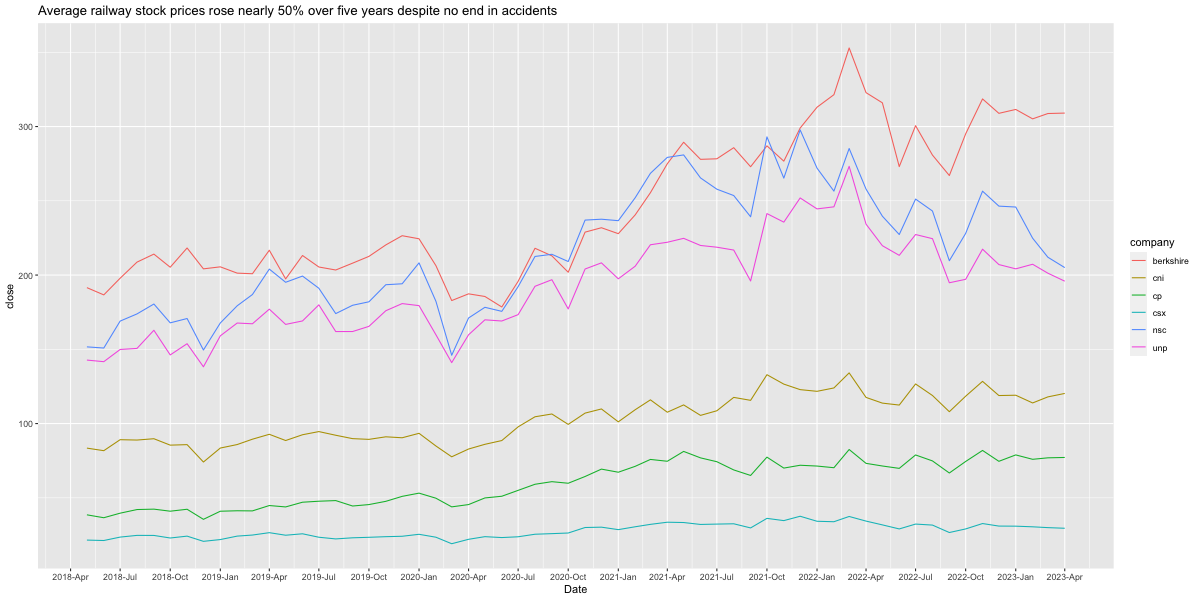

In [85]:
%%R -w 1200 -h 600

ggplot(monthly_stock_price)+
  geom_line(aes(x=date, y=close, group=company, color=company))+
  labs(title= "Average railway stock prices rose nearly 50% over five years despite no end in accidents ", x="Date", y="close") +
  scale_x_date(date_breaks = "3 months", date_labels = "%Y-%b")

In [43]:
%%R
library(dplyr)
library(lubridate)
# remove the row containing 'total'
railway_profits <- railway_profits[-1,]

# convert year to a date format
railway_profits$year <- as.Date(paste0(railway_profits$year, "-01-01"))
railway_profits


# A tibble: 29 × 8
   year       company           profit percentag…¹ notes derai…² miles…³ derai…⁴
   <date>     <chr>              <dbl>       <dbl> <chr>   <dbl>   <dbl>   <dbl>
 1 2021-01-01 BNSF          5990000000     0.161   <NA>      197   156.     1.26
 2 2020-01-01 BNSF          5161000000    -0.0584  <NA>      248   155.     1.60
 3 2019-01-01 BNSF          5481000000     0.0502  <NA>      301   176.     1.71
 4 2018-01-01 BNSF          5219000000     0.340   <NA>      288   187.     1.54
 5 2022-01-01 Union Pacific 6998000000     0.0728  <NA>      339   115.     2.96
 6 2021-01-01 Union Pacific 6523000000     0.219   <NA>      299   112.     2.66
 7 2020-01-01 Union Pacific 5349000000    -0.0963  <NA>      290   114.     2.55
 8 2019-01-01 Union Pacific 5919000000    -0.00788 <NA>      410   136.     3.01
 9 2018-01-01 Union Pacific 5966000000    -0.443   <NA>      355   154.     2.30
10 2022-01-01 CSX           4166000000     0.102   <NA>      120    60.9    1.97
# … with 

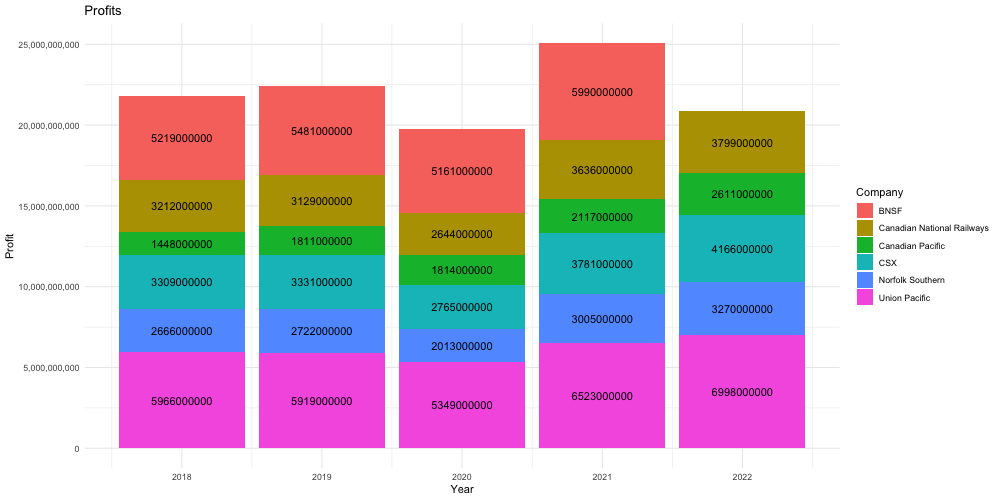

In [44]:
%%R -w 1000 -h 500

options(scipen = 999)

ggplot(railway_profits) +
  aes(fill=company, y=profit, x=year) +
  geom_bar(position="stack", stat="identity") +
  ggtitle("Profits") +
  theme_minimal() +
  labs(x = "Year", y = "Profit", fill = "Company") +
    scale_y_continuous(labels = scales::comma) +
    geom_text(aes(label=profit), position=position_stack(vjust=0.5))

In [45]:
%%R

# Read data
railway_profits_derailments <- read_csv('railway_profit_and_derailments.csv')
railway_profits_derailments

Rows: 30 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): company, notes
dbl (6): year, profit, percentage change, derailments, miles_traveled, derai...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 30 × 8
    year company           profit percentage cha…¹ notes derai…² miles…³ derai…⁴
   <dbl> <chr>              <dbl>            <dbl> <chr>   <dbl>   <dbl>   <dbl>
 1  2022 BNSF          5946000000         -0.00735 <NA>      248    152.    1.63
 2  2021 BNSF          5990000000          0.161   <NA>      197    156.    1.26
 3  2020 BNSF          5161000000         -0.0584  <NA>      248    155.    1.60
 4  2019 BNSF          5481000000          0.0502  <NA>      301    176.    1.71
 5  2018 BNSF          5219000000          0.340   <NA>      288    187.    1.54
 6  2022 Union Pacific 6998000000      

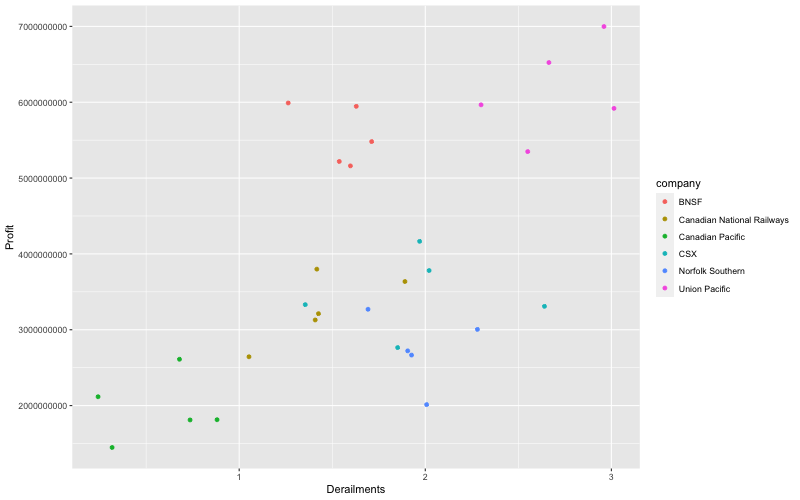

In [46]:
%%R -w 800 -h 500

ggplot(data = railway_profits_derailments, 
       aes(x = derailments_per_million_miles, y = profit, color = company, group = paste(company, year))) + 
  geom_point() +
  labs(x = "Derailments", y = "Profit")

In [101]:
railway_profits_derailments = pd.read_csv("railway_profits_and_derailments.csv")
railway_profits_derailments.head()

,year,company,profit,percentage change,notes,derailments,miles_traveled,derailments_per_million_miles,Unnamed: 8
0,2022,BNSF,5.95,-0.01,NaN,248,152.22,1.63,NaN
1,2021,BNSF,5.99,0.16,NaN,197,155.91,1.26,NaN
2,2020,BNSF,5.16,-0.06,NaN,248,155.22,1.60,NaN
3,2019,BNSF,5.48,0.05,NaN,301,175.82,1.71,NaN
4,2018,BNSF,5.22,0.34,NaN,288,187.27,1.54,NaN


In [108]:
%%R

railway_profits_derailments <- read_csv('/Users/rachelp/Downloads/railway_profits_and_derailments.csv')
railway_profits_derailments

averages <- railway_profits_derailments %>%
  group_by(year) %>%
  summarize(avg_derailments = mean(derailments),
            avg_profit = mean(profit))

New names:
• `` -> `...9`
Rows: 30 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): company, notes
dbl (6): year, profit, percentage change, derailments, miles_traveled, derai...
lgl (1): ...9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [109]:
%%R 

averages

# A tibble: 5 × 3
   year avg_derailments avg_profit
  <dbl>           <dbl>      <dbl>
1  2018            175.       3.63
2  2019            169.       3.73
3  2020            137.       3.28
4  2021            136.       4.17
5  2022            143.       4.46


In [86]:
%%R

scatterplot <- ggplot(averages, aes(x = avg_derailments, y = avg_profit)) +
  geom_point() +
  geom_text(aes(label = year), vjust = -1) +
  labs(x = "Average Derailments of All Companies", y = "Average Profit of All Companies",
       title = "Scatter Plot of Average Profit and Average Derailments") +
  scale_x_continuous(limits = c(0, NA)) +
  scale_y_continuous(limits = c(0, NA))+
theme_minimal()

In [88]:
%%R

scatterplot <- "scatterplot.svg"
svg_path <- "/path/to/folder/"

In [91]:
%%R

ggsave(file = paste0(scatterplot), device = "svg", width = 7, height = 5, dpi = 300)

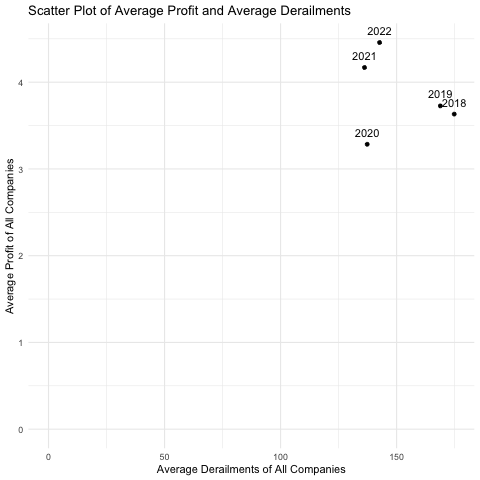

In [110]:
%%R

ggplot(averages, aes(x = avg_derailments, y = avg_profit)) +
  geom_point() +
  geom_text(aes(label = year), vjust = -1) +
  labs(x = "Average Derailments of All Companies", y = "Average Profit of All Companies",
       title = "Scatter Plot of Average Profit and Average Derailments") +
  scale_x_continuous(limits = c(0, NA)) +
  scale_y_continuous(limits = c(0, NA))+
theme_minimal()

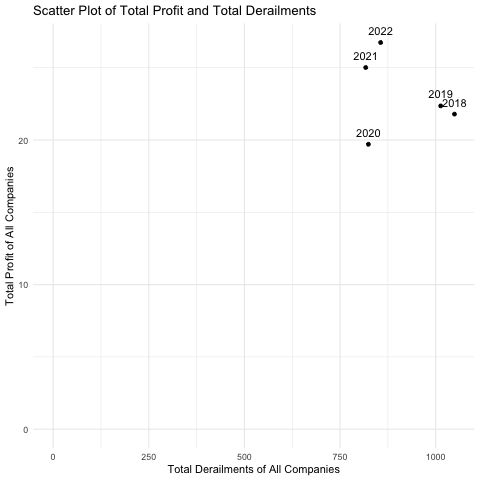

In [112]:
%%R

sums <- railway_profits_derailments %>%
  group_by(year) %>%
  summarize(total_derailments = sum(derailments),
            total_profit = sum(profit))

ggplot(sums, aes(x = total_derailments, y = total_profit)) +
  geom_point() +
  geom_text(aes(label = year), vjust = -1) +
  labs(x = "Total Derailments of All Companies", y = "Total Profit of All Companies",
       title = "Scatter Plot of Total Profit and Total Derailments") +
  scale_x_continuous(limits = c(0, NA)) +
  scale_y_continuous(limits = c(0, NA)) +
  theme_minimal()


In [113]:
%%R

scatterplot2 <- "scatterplot2.svg"
svg_path <- "/path/to/folder/"

ggsave(file = paste0(scatterplot2), device = "svg", width = 7, height = 5, dpi = 300)